# 1.- Importar librerias

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib notebook

## 2.- Importar dataset

In [5]:
df = pd.read_csv("datasets_127094_304788_economic_freedom_index2019_data.csv", encoding="ISO-8859-1")

# 3.- Visualizar dataframet

In [6]:
df

CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5             19.6   
1          52.0         27.0        66.5             54.8   
2         171.0         14.0        46.2             31.6   
3         156.0         33.0        50.6             35.9   
4         148.0         26.0        52.2             47.8   
..          ...          ...         ...              ...   
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  ...      Country  \
0                     29.6                  25.2  ...  Afghanistan   
1                     30.6                  40.4  ...      Albania   
2                     36.2                  28.9  ...      Algeria   
3                     26.6                  20.5  ...       Angola   
4                     44.5                  33.5  ...    Argentina   
..                     ...                   ...  ...          ...   
181                   13.1                   7.9  ...    Venezuela   
182                   40.3                  34.0  ...      Vietnam   
183                   22.2                  20.3  ...        Yemen   
184                   35.6                  32.3  ...       Zambia   
185                   24.8                  15.8  ...     Zimbabwe   

     Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                     35.5               $69.6                   2.5   
1                      2.9               $36.0                   3.9   
2                     41.5              $632.9                   2.0   
3                     28.2              $190.3                   0.7   
4                     44.1              $920.2                   2.9   
..                     ...                  ...                  ...   
181                   31.4              $380.7                 -14.0   
182                   93.6              $647.4                   6.8   
183                   30.0               $38.6                 -13.8   
184                   17.2               $68.9                   3.6   
185                   14.9               $34.0                   3.0   

     5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                           2.9                $1,958               8.8   
1                           2.5               $12,507              13.9   
2                           3.1               $15,237              10.0   
3                           2.9                $6,753               8.2   
4                           0.7               $20,876               8.7   
..                          ...                   ...               ...   
181                        -7.8               $12,114               7.7   
182                         6.2                $6,913               2.1   
18

# 4.- Preprocesamiento

In [7]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [8]:
df.describe(include='all')

CountryID Country Name      WEBNAME              Region  World Rank  \
count   186.000000          186          186                 186  180.000000   
unique         NaN          186          186                   5         NaN   
top            NaN  Afghanistan  Afghanistan  Sub-Saharan Africa         NaN   
freq           NaN            1            1                  48         NaN   
mean     93.500000          NaN          NaN                 NaN   90.500000   
std      53.837719          NaN          NaN                 NaN   52.105662   
min       1.000000          NaN          NaN                 NaN    1.000000   
25%      47.250000          NaN          NaN                 NaN   45.750000   
50%      93.500000          NaN          NaN                 NaN   90.500000   
75%     139.750000          NaN          NaN                 NaN  135.250000   
max     186.000000          NaN          NaN                 NaN  180.000000   

        Region Rank  2019 Score  Property Rights  Judical Effectiveness  \
count    180.000000  180.000000       185.000000             185.000000   
unique          NaN         NaN              NaN                    NaN   
top             NaN         NaN              NaN                    NaN   
freq            NaN         NaN              NaN                    NaN   
mean      20.538889   60.768333        52.327568              44.899459   
std       12.738611   11.255725        19.608526              18.104745   
min        1.000000    5.900000         7.600000               5.000000   
25%        9.750000   53.950000        37.000000              31.000000   
50%       19.500000   60.750000        50.100000              42.900000   
75%       31.000000   67.800000        65.900000              54.700000   
max       47.000000   90.200000        97.400000              92.400000   

        Government Integrity  ...      Country  Population (Millions)  \
count             185.000000  ...          186                    186   
unique                   NaN  ...          186                    139   
top                      NaN  ...  Afghanistan                    0.1   
freq                     NaN  ...            1                      6   
mean               41.470270  ...          NaN                    NaN   
std                19.793193  ...          NaN                    NaN   
min                 7.900000  ...          NaN                    NaN   
25%                27.200000  ...          NaN                    NaN   
50%                35.500000  ...          NaN                    NaN   
75%                50.300000  ...          NaN                    NaN   
max                96.700000  ...          NaN                    NaN   

        GDP (Billions, PPP)  GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  \
count                   185           184.000000                  183.000000   
unique                  176                  NaN                         NaN   
top                   $1.3                   NaN                         NaN   
freq                      3                  NaN                         NaN   
mean                    NaN             3.470109                    2.984153   
std                     NaN             5.835732                    2.926503   
min                     NaN           -14.000000                  -16.100000   
25%                     NaN             1.800000                    1.900000   
50%                     NaN             3.200000                    3.000000   
75%                     NaN             4.650000                    4.450000   
max                     NaN            70.800000                    9.900000   

        GDP per Capita (PPP)  Unemployment (%)  Inflation (%)  \
count                    184               181     182.000000   
unique                   184               107            NaN   
top                   $1,958               4.5            NaN   
freq                       1                 6   

In [9]:
df.isna().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployme

In [10]:
df = df.dropna()
df.isna().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployme

In [11]:
# discritización label
df['2019 Score'] = pd.cut(df['2019 Score'], bins=4, labels=False)

C:\Users\arche\AppData\Local\Temp/ipykernel_17760/3392557050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2019 Score'] = pd.cut(df['2019 Score'], bins=4, labels=False)


In [14]:
df_ = df.copy()

columns_ = df.select_dtypes(include = "object").columns

labelencoder = LabelEncoder()

for col in columns_:
    df_[col] = labelencoder.fit_transform(df_[col])

df_.head()

CountryID  Country Name  WEBNAME  Region  World Rank  Region Rank  \
0          1             0        0       1       152.0         39.0   
1          2             1        1       2        52.0         27.0   
2          3             2        2       3       171.0         14.0   
3          4             3        3       4       156.0         33.0   
4          5             4        4       0       148.0         26.0   

   2019 Score  Property Rights  Judical Effectiveness  Government Integrity  \
0           1             19.6                   29.6                  25.2   
1           2             54.8                   30.6                  40.4   
2           1             31.6                   36.2                  28.9   
3           1             35.9                   26.6                  20.5   
4           1             47.8                   44.5                  33.5   

   ...  Country  Population (Millions)  GDP (Billions, PPP)  \
0  ...        0                     81                  139   
1  ...        1                     57                   94   
2  ...        2                     92                  131   
3  ...        3                     66                   43   
4  ...        4                     94                  162   

   GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  \
0                  2.5                         2.9                    13   
1                  3.9                         2.5                    24   
2                  2.0                         3.1                    37   
3                  0.7                         2.9                   142   
4                  2.9                         0.7                    66   

   Unemployment (%)  Inflation (%)  FDI Inflow (Millions)  \
0                98            5.0                    124   
1                26            2.0                     14   
2                12            5.6                     19   
3                95           31.7                      2   
4                97           25.7                     38   

   Public Debt (% of GDP)  
0                     7.3  
1                    71.2  
2                    25.8  
3                    65.3  
4                    52.6  

[5 rows x 34 columns]

In [15]:
x = df_.iloc[:, 7:34].values
y = df_.iloc[:,6].values

In [16]:
x = StandardScaler().fit_transform(x)
x


array([[-1.77128313, -0.9343809 , -0.85992144, ..., -0.07130955,
         0.77698905, -1.46244886],
       [ 0.06457583, -0.87756266, -0.09484856, ..., -0.10775431,
        -1.44481435,  0.43052385],
       [-1.14542212, -0.55938051, -0.6736866 , ..., -0.06402059,
        -1.34382329, -0.91440512],
       ...,
       [-0.19619959, -0.32642572, -0.41698451, ..., -0.08953193,
        -0.8792644 ,  0.04541203],
       [-0.44654399, -0.59347145, -0.50255187, ..., -0.05187234,
        -1.46501257,  0.16390797],
       [-1.24451678, -1.20710846, -1.33305863, ..., -0.11625808,
        -0.01074125,  0.64381655]])

In [17]:
pca = PCA(n_components=3)
pca_f = pca.fit_transform(x)
X = pca_f.copy()
X.shape

(173, 3)

# 5.- Clusters

In [18]:
clusters = 4

In [19]:
# n_clusters = numero de cluster
# inicializar cluster = random
# verbose = mostrar en pantalla el proceso de clusterización
# fit = realizar el entrenamiento del modelo, con la matriz de los datos
kmeans = KMeans(n_clusters=clusters,init='random',random_state=10,verbose=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


Initialization complete
Iteration 0, inertia 1180.102754737231
Iteration 1, inertia 971.59121159462
Iteration 2, inertia 947.3006267234615
Iteration 3, inertia 945.7144722603451
Iteration 4, inertia 943.2362863988576
Iteration 5, inertia 941.9376707417038
Iteration 6, inertia 940.8362463954544
Iteration 7, inertia 940.2984084875785
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1700.4801712536182
Iteration 1, inertia 1048.6969557403097
Iteration 2, inertia 1015.2600689719626
Iteration 3, inertia 997.4968682726351
Iteration 4, inertia 989.9835775657369
Iteration 5, inertia 989.3296318193698
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1633.0030444540337
Iteration 1, inertia 1193.2543579957041
Iteration 2, inertia 1118.1354329687583
Iteration 3, inertia 1043.7615066813994
Iteration 4, inertia 965.9987146461289
Iteration 5, inertia 940.6826516798134
Iteration 6, inertia 935.3649384648919
Iteration 7,

# 6.- Visualización K-means clusters

<IPython.core.display.Javascript object>


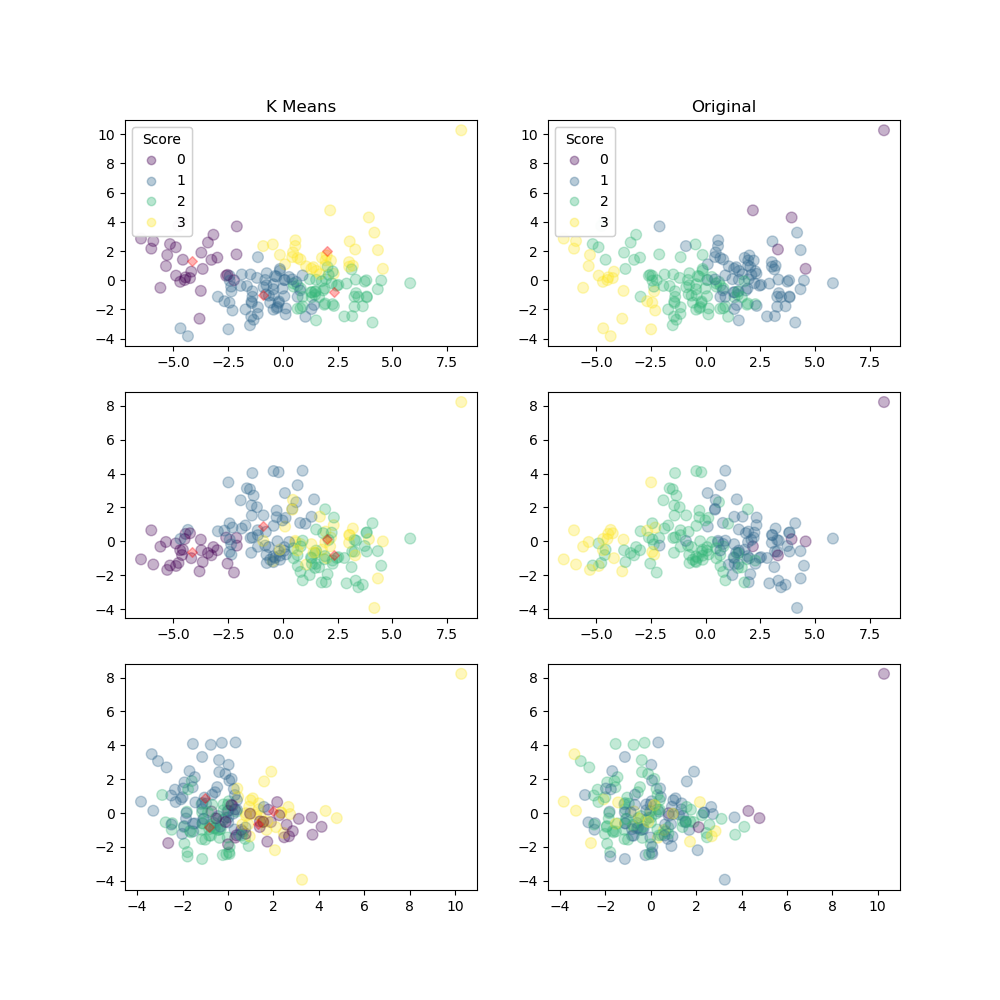

In [20]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=100)
ax[0,0].set_title('K Means')
l = ax[0,0].scatter(X[:,0], X[:,1], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[0,0].scatter(centroids[:, 0], centroids[:, 1], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)
ax[1,0].scatter(X[:,0], X[:,2], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[1,0].scatter(centroids[:, 0], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)
ax[2,0].scatter(X[:,1], X[:,2], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[2,0].scatter(centroids[:, 1], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)

ax[0,1].set_title('Original')
l2 = ax[0,1].scatter(X[:,0], X[:,1], 
           c= y, 
           s=60, 
           alpha=0.3)
ax[1,1].scatter(X[:,0], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3)
ax[2,1].scatter(X[:,1], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3)
legend1 = ax[0,0].legend(*l.legend_elements(),
                    loc="upper left", title="Score")
ax[0,0].add_artist(legend1)

legend2 = ax[0,1].legend(*l2.legend_elements(),
                    loc="upper left", title="Score")
ax[0,1].add_artist(legend2)


<IPython.core.display.Javascript object>


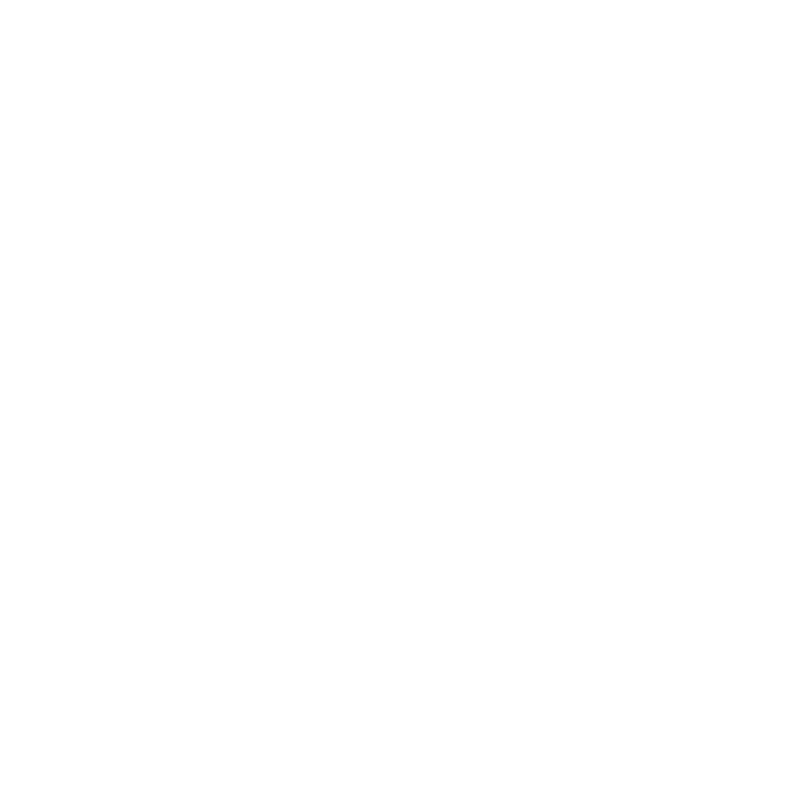

In [21]:
fig = plt.figure(figsize = (8, 8),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_.astype(float),alpha=0.5, edgecolor='k',s=50)
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=150,alpha=0.3)
ax.set_title('K Means',fontsize=20)

ax.legend(l3d.legend_elements()[0],[0,1,2,3])


<IPython.core.display.Javascript object>


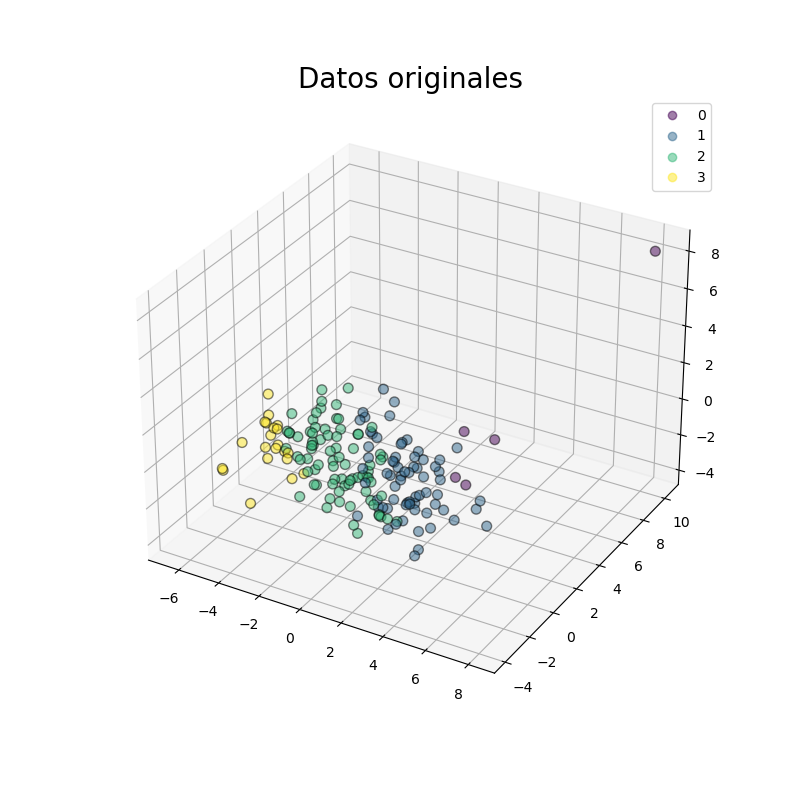

In [22]:
fig = plt.figure(figsize = (8, 8),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d_ = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y,alpha=0.5, edgecolor='k',s=50)
ax.set_title('Datos originales',fontsize=20)

ax.legend(l3d_.legend_elements()[0],[0,1,2,3])